## Data Science Challenge

In [651]:
# If additional packages are needed that are not installed by default, uncomment the last two lines of this 
# cell and replace <package list> with a list of additional packages.
# This will ensure the notebook has all the dependencies and works everywhere

#import sys
#!{sys.executable} -m pip install <package list>

In [652]:
#Libraries
import pandas as pd
pd.set_option("display.max_columns", 101)

In [653]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from datetime import datetime
from datetime import date
import calendar
from pandas.api.types import is_string_dtype
from pandas.api.types import is_numeric_dtype
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

import sklearn
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.feature_selection import RFE
from sklearn.metrics import r2_score

from math import sqrt

## Data Description

Column | Description
:---|:---
`id` | Record index
`timestamp` | Datetime (YYYY:MM:DD HH AM/PM)
`season` | Season (spring, summer, fall, winter)
`holiday` | Whether day is a holiday or not (Yes or No)
`workingday` | Whether day is a working day or not (Yes or No)
`weather`| Weather condition (Clear or partly cloudy, Mist, Light snow or rain, heavy rain/ice pellets/ snow + fog 
`temp`| Average temperature recorded for the hour ( in degree Celsius)
`temp_feel`| Average feeling temperature recorded for the hour ( in degree Celsius)
`hum`| Average humidity recorded for the hour (in %)
`windspeed`| Average wind speed recorded for the hour (in miles/hour)
`demand`| Hourly count of bikes rented

## Data Wrangling & Visualization

In [654]:
# The dataset is already loaded below
tr = pd.read_csv("train.csv")
tr.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed,demand
0,1,2017-01-01 00:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,81.0,0.0,2.772589
1,2,2017-01-01 01:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.688879
2,3,2017-01-01 02:00:00,spring,No,No,Clear or partly cloudy,9.02,13.635,80.0,0.0,3.465736
3,4,2017-01-01 03:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,2.564949
4,5,2017-01-01 04:00:00,spring,No,No,Clear or partly cloudy,9.84,14.395,75.0,0.0,0.000000


In [655]:
te=pd.read_csv("test.csv")
te.head()

,id,timestamp,season,holiday,workingday,weather,temp,temp_feel,humidity,windspeed
0,8709,2018-08-05 05:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,74.0,16.9979
1,8710,2018-08-05 06:00:00,fall,No,No,Clear or partly cloudy,29.52,34.850,79.0,16.9979
2,8712,2018-08-05 08:00:00,fall,No,No,Clear or partly cloudy,31.16,36.365,66.0,22.0028
3,8713,2018-08-05 09:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,23.9994
4,8714,2018-08-05 10:00:00,fall,No,No,Clear or partly cloudy,32.80,38.635,59.0,27.9993


In [656]:
tr.describe()

,id,temp,temp_feel,humidity,windspeed,demand
count,8708.000000,7506.000000,8606.000000,8669.00000,8508.000000,8708.000000
mean,4354.500000,20.089454,23.531261,60.99354,13.048589,4.452725
std,2513.927405,8.023304,8.737997,19.67989,8.311058,1.493963
min,1.000000,0.820000,0.760000,0.00000,0.000000,0.000000
25%,2177.750000,13.940000,15.910000,46.00000,7.001500,3.637586
50%,4354.500000,20.500000,24.240000,60.00000,12.998000,4.867534
75%,6531.250000,26.240000,31.060000,77.00000,19.001200,5.556828
max,8708.000000,41.000000,45.455000,100.00000,56.996900,6.792344


In [657]:
tr.shape, te.shape

((8708, 11), (1792, 10))

In [658]:
tr.columns

Index(['id', 'timestamp', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'temp_feel', 'humidity', 'windspeed', 'demand'],
      dtype='object')

In [659]:
te.columns

Index(['id', 'timestamp', 'season', 'holiday', 'workingday', 'weather', 'temp',
       'temp_feel', 'humidity', 'windspeed'],
      dtype='object')

In [660]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8708 non-null   int64  
 1   timestamp   8708 non-null   object 
 2   season      8708 non-null   object 
 3   holiday     8708 non-null   object 
 4   workingday  8708 non-null   object 
 5   weather     8708 non-null   object 
 6   temp        7506 non-null   float64
 7   temp_feel   8606 non-null   float64
 8   humidity    8669 non-null   float64
 9   windspeed   8508 non-null   float64
 10  demand      8708 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 748.5+ KB


In [661]:
tr.isnull().sum()

id               0
timestamp        0
season           0
holiday          0
workingday       0
weather          0
temp          1202
temp_feel      102
humidity        39
windspeed      200
demand           0
dtype: int64

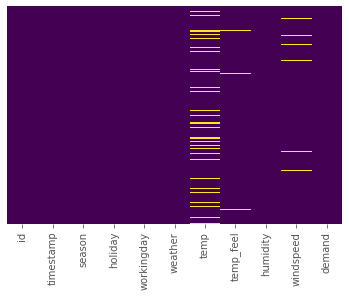

In [662]:
plt.figure(figsize=(6,4))
sns.heatmap(tr.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [663]:
tr['temp'] = tr['temp'].fillna(tr['temp'].median())
tr['temp_feel'] = tr['temp_feel'].fillna(tr['temp_feel'].median())
tr['humidity'] = tr['humidity'].fillna(tr['humidity'].median())
tr['windspeed'] = tr['windspeed'].fillna(tr['windspeed'].median())

In [664]:
tr.isnull().sum()

id            0
timestamp     0
season        0
holiday       0
workingday    0
weather       0
temp          0
temp_feel     0
humidity      0
windspeed     0
demand        0
dtype: int64

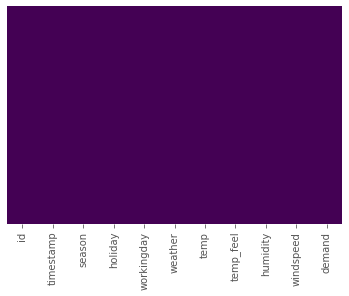

In [665]:
plt.figure(figsize=(6,4))
sns.heatmap(tr.isnull(), yticklabels=False, cbar=False, cmap='viridis');

In [666]:
te.isnull().sum()

id            0
timestamp     0
season        0
holiday       0
workingday    0
weather       0
temp          0
temp_feel     0
humidity      0
windspeed     0
dtype: int64

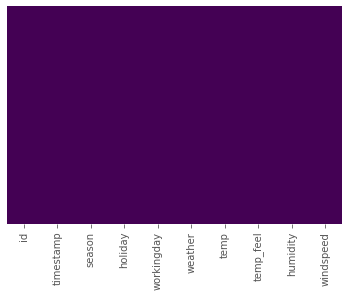

In [667]:
plt.figure(figsize=(6,4))
sns.heatmap(te.isnull(), yticklabels=False, cbar=False, cmap='viridis');

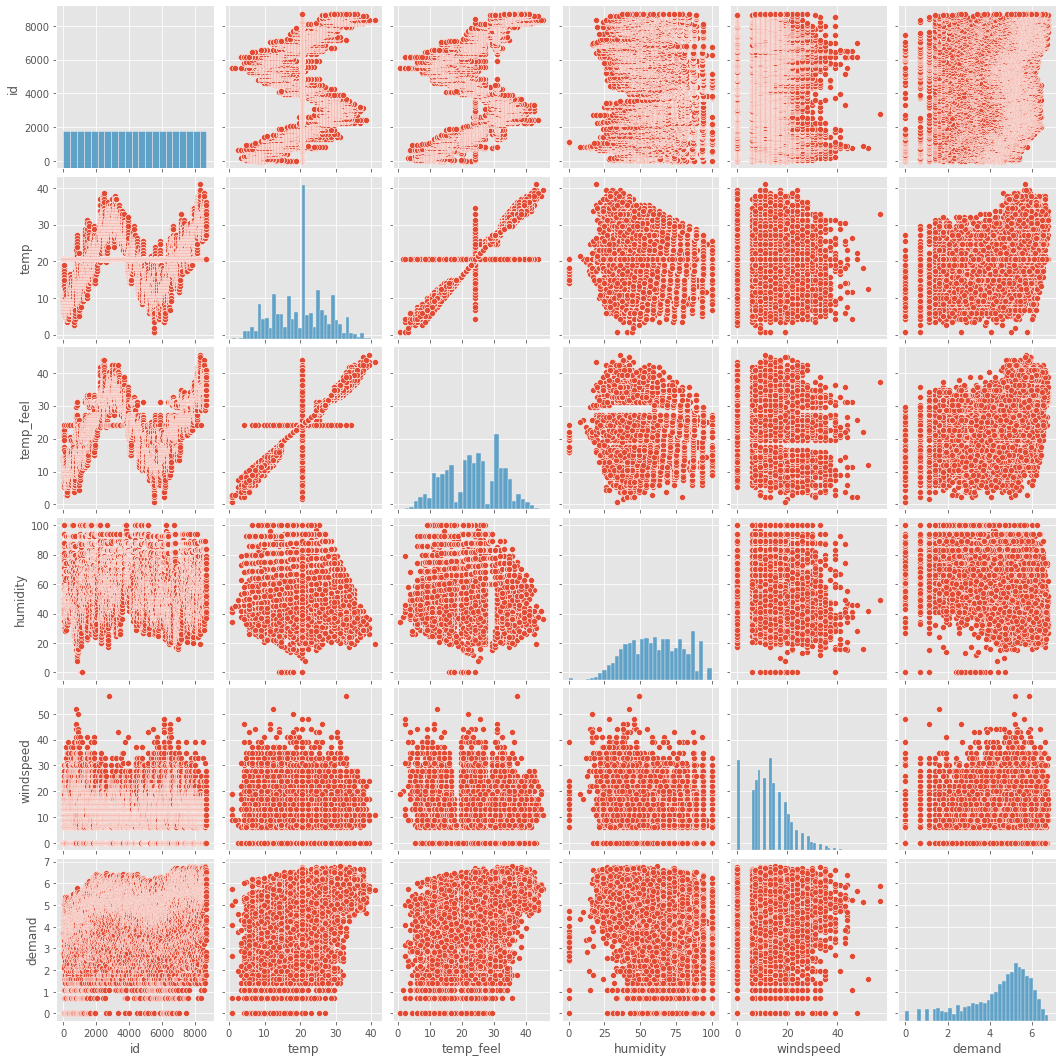

In [668]:
plt.style.use('ggplot')
sns.pairplot(tr);

/Library/Frameworks/Python.framework/Versions/3.9/lib/python3.9/site-packages/seaborn/distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


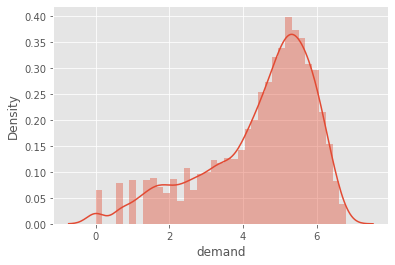

In [669]:
sns.distplot(tr['demand']);

In [670]:
tr.describe(include=object)

,timestamp,season,holiday,workingday,weather
count,8708,8708,8708,8708,8708
unique,8708,4,2,2,4
top,2017-11-02 19:00:00,summer,No,Yes,Clear or partly cloudy
freq,1,2733,8469,5949,5858


## Outlier Analysis

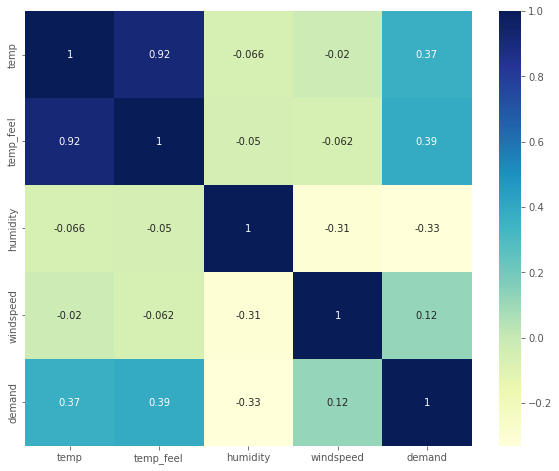

In [671]:
corr_tr = tr[["temp","temp_feel","humidity","windspeed","demand"]]
corrmat_tr = corr_tr.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corrmat_tr, annot = True, cmap= 'YlGnBu');

In [672]:
# Drop negatively correlated columns
from datetime import datetime
tr.Date=pd.to_datetime(tr.timestamp )
tr.info()
tr['Month']=pd.DatetimeIndex(tr['timestamp']).month
tr['Year']=pd.DatetimeIndex(tr['timestamp']).year
tr['Day']=pd.DatetimeIndex(tr['timestamp']).day
tr['Hour']=pd.DatetimeIndex(tr['timestamp']).hour
tr.drop(['humidity','windspeed'],axis=1,inplace=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 11 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8708 non-null   int64  
 1   timestamp   8708 non-null   object 
 2   season      8708 non-null   object 
 3   holiday     8708 non-null   object 
 4   workingday  8708 non-null   object 
 5   weather     8708 non-null   object 
 6   temp        8708 non-null   float64
 7   temp_feel   8708 non-null   float64
 8   humidity    8708 non-null   float64
 9   windspeed   8708 non-null   float64
 10  demand      8708 non-null   float64
dtypes: float64(5), int64(1), object(5)
memory usage: 748.5+ KB


<ipython-input-672-65763627f310>:3: UserWarning: Pandas doesn't allow columns to be created via a new attribute name - see https://pandas.pydata.org/pandas-docs/stable/indexing.html#attribute-access
  tr.Date=pd.to_datetime(tr.timestamp )


In [673]:
tr.drop('timestamp',axis=1,inplace=True)
tr.head()

,id,season,holiday,workingday,weather,temp,temp_feel,demand,Month,Year,Day,Hour
0,1,spring,No,No,Clear or partly cloudy,9.84,14.395,2.772589,1,2017,1,0
1,2,spring,No,No,Clear or partly cloudy,9.02,13.635,3.688879,1,2017,1,1
2,3,spring,No,No,Clear or partly cloudy,9.02,13.635,3.465736,1,2017,1,2
3,4,spring,No,No,Clear or partly cloudy,9.84,14.395,2.564949,1,2017,1,3
4,5,spring,No,No,Clear or partly cloudy,9.84,14.395,0.000000,1,2017,1,4


In [674]:
tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          8708 non-null   int64  
 1   season      8708 non-null   object 
 2   holiday     8708 non-null   object 
 3   workingday  8708 non-null   object 
 4   weather     8708 non-null   object 
 5   temp        8708 non-null   float64
 6   temp_feel   8708 non-null   float64
 7   demand      8708 non-null   float64
 8   Month       8708 non-null   int64  
 9   Year        8708 non-null   int64  
 10  Day         8708 non-null   int64  
 11  Hour        8708 non-null   int64  
dtypes: float64(3), int64(5), object(4)
memory usage: 816.5+ KB


In [675]:
# tr['timestamp'] = pd.to_datetime(tr['timestamp'])
# te['timestamp'] = pd.to_datetime(te['timestamp'])

In [676]:
# type(tr['timestamp'][0]), type(te['timestamp'][0])

In [677]:
# tr['year'] = tr['timestamp'].dt.year
# tr['month'] = tr['timestamp'].dt.month
# tr['date'] = tr['timestamp'].dt.date
# tr['hour'] = tr['timestamp'].dt.hour
# tr['day of the week'] = tr['timestamp'].dt.dayofweek

In [678]:
# te['year'] = te['timestamp'].dt.year
# te['month'] = te['timestamp'].dt.month
# te['date'] = te['timestamp'].dt.date
# te['hour'] = te['timestamp'].dt.hour
# te['day of the week'] = te['timestamp'].dt.dayofweek

In [679]:
# #converting day of the weeks to name of the day
# dmap = {0:'Mon', 1:'Tue', 2:'Wed',3:'Thu',4:'Fri',5:'Sat',6:'Sun'}
# tr['day of the week'] = tr['day of the week'].map(dmap)
# te['day of the week'] = te['day of the week'].map(dmap)

In [680]:
catcol=tr.select_dtypes(include='object')

In [681]:
print("Categorical Values:", catcol.head())

Categorical Values:    season holiday workingday                 weather
0  spring      No         No  Clear or partly cloudy
1  spring      No         No  Clear or partly cloudy
2  spring      No         No  Clear or partly cloudy
3  spring      No         No  Clear or partly cloudy
4  spring      No         No  Clear or partly cloudy


In [682]:
Bikes_tr=tr
for cols in catcol:
  dummies =pd.get_dummies(tr[cols],drop_first=True)
  Bikes_tr = pd.concat([Bikes_tr,dummies],axis='columns')

In [683]:
Bikes_tr.head()

,id,season,holiday,workingday,weather,temp,temp_feel,demand,Month,Year,Day,Hour,spring,summer,winter,Yes,Yes,Light snow or rain,Mist,heavy rain/ice pellets/snow + fog
0,1,spring,No,No,Clear or partly cloudy,9.84,14.395,2.772589,1,2017,1,0,1,0,0,0,0,0,0,0
1,2,spring,No,No,Clear or partly cloudy,9.02,13.635,3.688879,1,2017,1,1,1,0,0,0,0,0,0,0
2,3,spring,No,No,Clear or partly cloudy,9.02,13.635,3.465736,1,2017,1,2,1,0,0,0,0,0,0,0
3,4,spring,No,No,Clear or partly cloudy,9.84,14.395,2.564949,1,2017,1,3,1,0,0,0,0,0,0,0
4,5,spring,No,No,Clear or partly cloudy,9.84,14.395,0.000000,1,2017,1,4,1,0,0,0,0,0,0,0


In [684]:
Bikes_tr.drop(['season','holiday','workingday','weather'], axis = 1, inplace = True)

In [685]:
Bikes_tr.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8708 entries, 0 to 8707
Data columns (total 16 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   id                                 8708 non-null   int64  
 1   temp                               8708 non-null   float64
 2   temp_feel                          8708 non-null   float64
 3   demand                             8708 non-null   float64
 4   Month                              8708 non-null   int64  
 5   Year                               8708 non-null   int64  
 6   Day                                8708 non-null   int64  
 7   Hour                               8708 non-null   int64  
 8   spring                             8708 non-null   uint8  
 9   summer                             8708 non-null   uint8  
 10  winter                             8708 non-null   uint8  
 11  Yes                                8708 non-null   uint8

In [686]:
Bikes_tr.shape

(8708, 16)

In [687]:
from sklearn.preprocessing import StandardScaler
# Initialise the Scaler
scaler = StandardScaler()
  
# To scale data
scaler.fit(Bikes_tr)

StandardScaler()

In [688]:
Bikes_tr_numeric_features = Bikes_tr.select_dtypes(include=np.number)

id


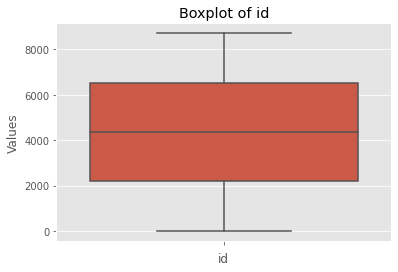

temp


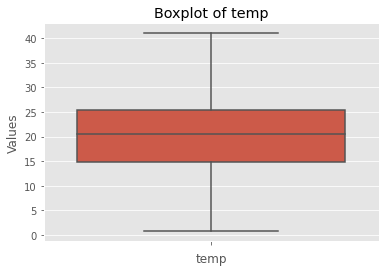

temp_feel


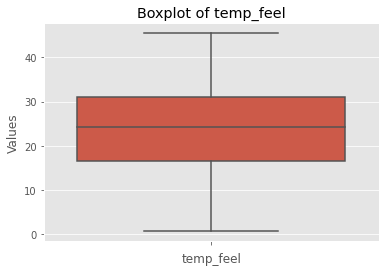

demand


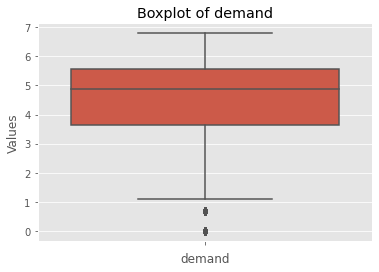

Month


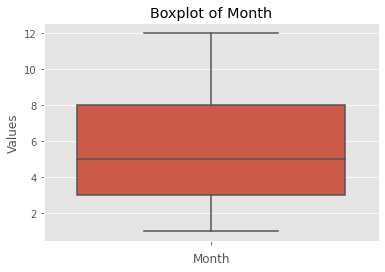

Year


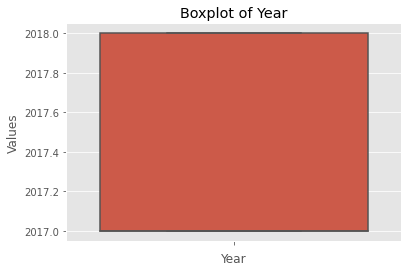

Day


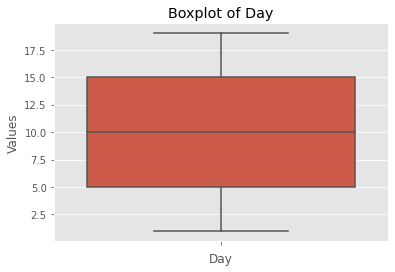

Hour


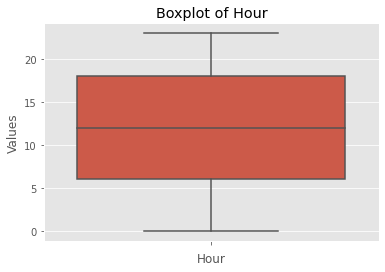

spring


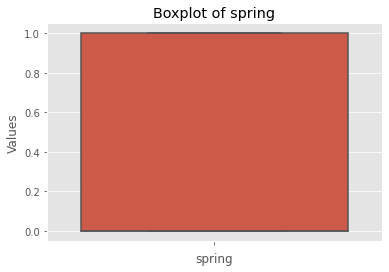

summer


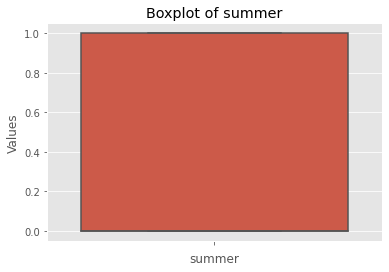

winter


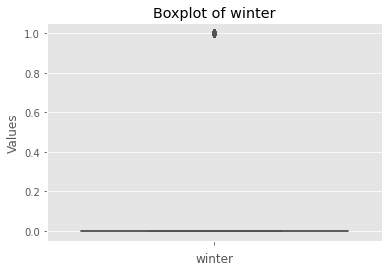

Yes


ValueError: The truth value of a Series is ambiguous. Use a.empty, a.bool(), a.item(), a.any() or a.all().

In [689]:
for i in Bikes_tr_numeric_features:
    print(i)
    sns.boxplot(y = Bikes_tr[i])
    plt.xlabel(i)
    plt.ylabel("Values")
    plt.title("Boxplot of " + i)
    plt.show()

In [ ]:
# # Identify outliers
# #calculate Inner Fence, Outer Fence, and IQR

# for i in Bikes_tr_numeric_features:
#     print(i)
#     q75, q25 = np.percentile(Bikes_tr.loc[:,i], [75, 25])
#     iqr = q75 - q25
#     Innerfence = q25 - (iqr*1.5)
#     Upperfence = q75 + (iqr*1.5)
#     print("Innerfence= "+str(Innerfence))
#     print("Upperfence= "+str(Upperfence)) 
#     print("IQR ="+str(iqr))
    

# # replace outliers with NA

#     Bikes_tr.loc[Bikes_tr[i]<Innerfence, i] = np.nan
#     Bikes_tr.loc[Bikes_tr[i]>Upperfence, i] = np.nan

In [694]:
Bikes_tr.isnull().sum()

id                                   0
temp                                 0
temp_feel                            0
demand                               0
Month                                0
Year                                 0
Day                                  0
Hour                                 0
spring                               0
summer                               0
winter                               0
Yes                                  0
Yes                                  0
Light snow or rain                   0
Mist                                 0
heavy rain/ice pellets/snow + fog    0
dtype: int64

In [695]:
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split 
from sklearn.metrics import mean_squared_error
from scipy.stats.stats import pearsonr

In [696]:
#define Error Metrics.

def MAPE(y_actual, y_predicted):
    MAPE = np.mean(np.abs(y_actual-y_predicted)/y_actual)*100
    return MAPE

def Rsquare(y_actual, y_predicted):
    Rsquare = np.corrcoef(y_actual,y_predicted)**2
    return Rsquare

In [697]:
#predictors and target

X = Bikes_tr.drop(['demand'], axis = "columns")
y = Bikes_tr['demand']

In [698]:
#divide the data into train and test

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=.20, random_state=0)

## RANDOM FOREST

In [699]:

from sklearn.ensemble import RandomForestRegressor

RFModel = RandomForestRegressor(n_estimators=100).fit(X_train,y_train)

# Predictions
RFTest = RFModel.predict(X_test)

# MAPE 
RFMape_Test = MAPE(y_test, RFTest)

# Rsquare - Test Data

RFR2_Test = Rsquare(y_test, RFTest)

RFR2_Test1 = RFR2_Test.ravel()

RFR2_Test2 = float(RFR2_Test1[1])

print("MAPE ="+str(RFMape_Test))
print("Accuracy =" + str(100 - RFMape_Test))
print("Rsquare ="+str(RFR2_Test2))

MAPE =inf
Accuracy =-inf
Rsquare =0.9356668540581227


In [700]:
RFModel

RandomForestRegressor()

## LINEAR REGRESSION MODEL

In [701]:
import statsmodels.api as sm
LRModel= sm.OLS(y_train, X_train).fit()
print(LRModel.summary())

                                 OLS Regression Results                                
Dep. Variable:                 demand   R-squared (uncentered):                   0.946
Model:                            OLS   Adj. R-squared (uncentered):              0.946
Method:                 Least Squares   F-statistic:                              8062.
Date:                Thu, 28 Oct 2021   Prob (F-statistic):                        0.00
Time:                        05:40:41   Log-Likelihood:                         -10504.
No. Observations:                6966   AIC:                                  2.104e+04
Df Residuals:                    6951   BIC:                                  2.114e+04
Df Model:                          15                                                  
Covariance Type:            nonrobust                                                  
                                        coef    std err          t      P>|t|      [0.025      0.975]
------------------

In [702]:
#Prediction

LRTest = LRModel.predict(X_test)

#MAPE

LRMape_Test = MAPE(y_test, LRTest)


#Rsquare -Test Data

LRR2_Test = Rsquare(y_test, LRTest)

LRR2_Test1 = LRR2_Test.ravel()

LRR2_Test2 = float(LRR2_Test1[1])


print("MAPE ="+str(LRMape_Test))
print("Accuracy =" + str(100 - LRMape_Test))
print("Rsquare ="+str(LRR2_Test2))

MAPE =inf
Accuracy =-inf
Rsquare =0.4424367933805253


In [703]:
df_for_KFCV = Bikes_tr

## KFold Cross Validation

In [704]:
df_for_KFCV.head()

,id,temp,temp_feel,demand,Month,Year,Day,Hour,spring,summer,winter,Yes,Yes,Light snow or rain,Mist,heavy rain/ice pellets/snow + fog
0,1,9.84,14.395,2.772589,1,2017,1,0,1,0,0,0,0,0,0,0
1,2,9.02,13.635,3.688879,1,2017,1,1,1,0,0,0,0,0,0,0
2,3,9.02,13.635,3.465736,1,2017,1,2,1,0,0,0,0,0,0,0
3,4,9.84,14.395,2.564949,1,2017,1,3,1,0,0,0,0,0,0,0
4,5,9.84,14.395,0.000000,1,2017,1,4,1,0,0,0,0,0,0,0


In [706]:
X_kf = df_for_KFCV.drop(['demand'], axis = "columns")
y_kf = df_for_KFCV['demand']

In [707]:
X_kf.head()

,id,temp,temp_feel,Month,Year,Day,Hour,spring,summer,winter,Yes,Yes,Light snow or rain,Mist,heavy rain/ice pellets/snow + fog
0,1,9.84,14.395,1,2017,1,0,1,0,0,0,0,0,0,0
1,2,9.02,13.635,1,2017,1,1,1,0,0,0,0,0,0,0
2,3,9.02,13.635,1,2017,1,2,1,0,0,0,0,0,0,0
3,4,9.84,14.395,1,2017,1,3,1,0,0,0,0,0,0,0
4,5,9.84,14.395,1,2017,1,4,1,0,0,0,0,0,0,0


In [708]:
from sklearn.model_selection import cross_val_score

In [709]:
cross_val_score(DecisionTreeRegressor(max_depth=2), X_kf,y_kf, cv = 3)
#array([ 0.23365401, -0.23313404,  0.15690143])

DT_Score = cross_val_score(DecisionTreeRegressor(max_depth=2), X_kf,y_kf, cv = 3)
np.average(DT_Score)

0.5459236098331327

In [710]:
cross_val_score(RandomForestRegressor(), X_kf,y_kf, cv = 3)
#array([0.69521348, 0.27999794, 0.452253  ])
RF_Score = cross_val_score(RandomForestRegressor(n_estimators = 100), X_kf,y_kf, cv = 3)
np.average(RF_Score)

0.8581828944737858

In [717]:
from sklearn.linear_model import LinearRegression
cross_val_score(LinearRegression(), X_kf,y_kf, cv = 7)
#array([0.73477372, 0.6035598 , 0.54577344])

LR_Score = cross_val_score(LinearRegression(), X_kf,y_kf, cv = 7)
np.average(LR_Score)

0.3373138642757083